# Julia for R-Lovers
Part one: Basics of working with R & Julia

1. Julia basics 
2. RCall & using R in Julia
3. Communicating between R and Julia
4. (Some) essential Julia packages for data science

## 1. Julia basics

### Basic code conventions
- #: comment
    - #= =#: multi-line comment
- basic math symbols as expected (+, -, /, *, ^, %)
- assign variables with =
- typeof(): gives variable type (Int64, Float64, String, etc.)
    - concrete types (Int64, Float64) belong to more abstract types (Float, Number, Any)
    - convert(Float64, 3): changes variable type
- can use unicode characters like emojis and mathematical symbols


In [1]:
#comment 

#= long comment
over multiple lines =#

1247 - 42

1205

In [2]:
number = 10

10

In [3]:
number_2 = 1.5

1.5

In [4]:
typeof(number)

Int64

In [5]:
typeof(number_2)

Float64

In [6]:
number + number_2

11.5

In [7]:
number * number_2

15.0

In [8]:
convert(Float64, number)

10.0

### Strings
- Define strings with " " or """ """ 
- Define characters (char) with ' ' 
- string(): convert to string and concatenate strings
- *: to concatenate strings
    - Ex: varname * varname 
    
*Note: using ; at end of line suppresses output in Julia*

In [9]:
hashtag = "rstats";
language = 'R';

In [10]:
typeof(hashtag)

String

In [11]:
typeof(language)

Char

In [12]:
greeting = 'hello'

LoadError: [91msyntax: character literal contains multiple characters[39m

In [13]:
hashtag * language

"rstatsR"

## 2. R-Call & using R in Julia
https://juliainterop.github.io/RCall.jl/latest/gettingstarted.html

- Support for dual-language workflow with R & Julia 
- Comparable packages exist for working with Julia in R but are less efficient

### R-Call essentials
- R" " or R""" """

In [14]:
#using Pkg
#Pkg.add("RCall") #analogous to install.packages("package") in R

using RCall #analogous to library(package) in R

In [15]:
R"nchar('Julia is great!')"

RObject{IntSxp}
[1] 15


In [16]:
R"round(rnorm(10,100,15), 1)"

RObject{RealSxp}
 [1] 110.7 119.0 115.9  84.3 113.5 106.7  84.3  95.8 105.9  76.0


In [17]:
R"""
fav_langs <- c("Julia", "R", "Python")

paste("I have", length(fav_langs), "favorite languages!")
"""

RObject{StrSxp}
[1] "I have 3 favorite languages!"


In [18]:
R"fav_langs"

RObject{StrSxp}
[1] "Julia"  "R"      "Python"


- You can also load packages to R in the Julia envrionment and continue to use functions from them

In [19]:
R"library(tidyverse)"

┌ Warning: RCall.jl: Warning: replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’
│ ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
│ ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
│ ✔ tibble  3.1.2     ✔ dplyr   1.0.0
│ ✔ tidyr   1.1.2     ✔ stringr 1.4.0
│ ✔ readr   1.3.1     ✔ forcats 0.5.0
│ ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
│ ✖ dplyr::filter() masks stats::filter()
│ ✖ dplyr::lag()    masks stats::lag()
└ @ RCall /Users/kylamcconnell/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{StrSxp}
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     


In [20]:
R"ratings <- tibble(language = c('Julia', 'R', 'Python', 'Java'), rating = c(9, 10, 8, 1))"

RObject{VecSxp}
# A tibble: 4 x 2
  language rating
  <chr>     <dbl>
1 Julia         9
2 R            10
3 Python        8
4 Java          1


In [21]:
R"""
ratings %>%
   arrange(desc(rating))
"""

RObject{VecSxp}
# A tibble: 4 x 2
  language rating
  <chr>     <dbl>
1 R            10
2 Julia         9
3 Python        8
4 Java          1


In [22]:
R"""
ratings <- ratings %>% 
   mutate(percent = rating * 10)

ratings
"""

RObject{VecSxp}
# A tibble: 4 x 3
  language rating percent
  <chr>     <dbl>   <dbl>
1 Julia         9      90
2 R            10     100
3 Python        8      80
4 Java          1      10


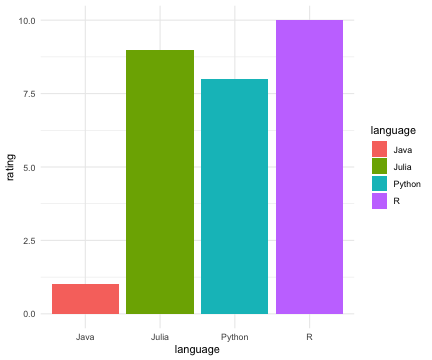

RObject{VecSxp}


In [23]:
R"""
ggplot(ratings, aes(x = language, y = rating, fill = language)) +
  geom_col() +
  theme_minimal()
"""

## 3. Communiating between R and Julia

What about Julia?

- Create variables in Julia and transfer them to R with $

In [24]:
greeting = "Hello there users of R!"

"Hello there users of R!"

In [25]:
R"toupper($greeting)"

RObject{StrSxp}
[1] "HELLO THERE USERS OF R!"


In [26]:
hrs = 3

R"mns <- 60 * $hrs"

RObject{RealSxp}
[1] 180


In [27]:
R"paste('There are', mns, 'minutes in', $hrs, 'hours.')"

RObject{StrSxp}
[1] "There are 180 minutes in 3 hours."


- Can also substitute Julia operations into your R code with $

In [28]:
findfirst("love", "We all love R!") #example function I know in Julia but not R, returns index of substring

8:11

In [29]:
R"""
solitude <- 'Many years later, as he faced the firing squad, Colonel Aureliano Buendía was to remember that distant afternoon when his father took him to discover ice.'

$findfirst("afternoon", solitude)
"""

RObject{IntSxp}
[1] 105 106 107 108 109 110 111 112 113


### How to get objects from R back to Julia?

Macros: @rput & @rget
- Macros = metacode: Julia code that alters Julia code
- Move the variable from R to Julia (or vice versa) with the same name (and keep it there)

In [30]:
@rget solitude 

solitude

"Many years later, as he faced the firing squad, Colonel Aureliano Buendía was to remember that distant afternoon when his father took him to discover ice."

In [31]:
solitude[105:113]

"afternoon"

In [32]:
R"dist <- round(rnorm(100, 25, 5), 1)"

RObject{RealSxp}
  [1] 37.2 25.9 25.1 27.7 23.2 20.4 28.2 21.0 27.7 21.1 17.1 22.8 23.7 25.0 32.1
 [16] 22.7 29.0 26.5 34.4 28.7 26.6 39.5 30.0 18.2 33.1 29.0 17.2 31.0 24.4 30.9
 [31] 26.0 23.8 18.3 25.5 21.1 25.0 26.1 32.2 27.2 26.9 25.5 18.7 23.1 13.0 22.8
 [46] 33.0 21.6 18.5 25.3 23.5 24.9 15.1 21.2 22.7 19.2 23.4 25.1 21.2 25.9 26.2
 [61] 24.4 17.4 21.5 28.9 26.0 27.9 29.6 31.9 24.7 21.5 27.3 26.1 28.1 21.0 27.9
 [76] 20.0 26.5 30.2 26.2 24.6 26.0 20.0 27.4 10.4 22.3 23.6 28.2 31.0 28.7 27.3
 [91] 30.2 23.2 18.5 28.9 19.8 33.3 21.6 21.5 29.6 30.1


In [33]:
@rget dist

length(dist)

100

In [34]:
dist = sqrt.(dist) #elementwise square roots

100-element Array{Float64,1}:
 6.099180272790763
 5.089204259999788
 5.0099900199501395
 5.263078946776307
 4.8166378315169185
 4.516635916254486
 5.310367218940701
 4.58257569495584
 5.263078946776307
 4.5934736311423405
 4.135214625627067
 4.774934554525329
 4.868264577855234
 ⋮
 5.357238094391549
 5.224940191045253
 5.495452665613635
 4.8166378315169185
 4.301162633521313
 5.375872022286245
 4.449719092257398
 5.770615218501403
 4.6475800154489
 4.636809247747852
 5.440588203494177
 5.486346689738081

In [35]:
@rput dist;

In [36]:
R"dist"

RObject{RealSxp}
  [1] 6.099180 5.089204 5.009990 5.263079 4.816638 4.516636 5.310367 4.582576
  [9] 5.263079 4.593474 4.135215 4.774935 4.868265 5.000000 5.665686 4.764452
 [17] 5.385165 5.147815 5.865151 5.357238 5.157519 6.284903 5.477226 4.266146
 [25] 5.753260 5.385165 4.147288 5.567764 4.939636 5.558777 5.099020 4.878524
 [33] 4.277850 5.049752 4.593474 5.000000 5.108816 5.674504 5.215362 5.186521
 [41] 5.049752 4.324350 4.806246 3.605551 4.774935 5.744563 4.647580 4.301163
 [49] 5.029911 4.847680 4.989990 3.885872 4.604346 4.764452 4.381780 4.837355
 [57] 5.009990 4.604346 5.089204 5.118594 4.939636 4.171331 4.636809 5.375872
 [65] 5.099020 5.282045 5.440588 5.648008 4.969909 4.636809 5.224940 5.108816
 [73] 5.300943 4.582576 5.282045 4.472136 5.147815 5.495453 5.118594 4.959839
 [81] 5.099020 4.472136 5.234501 3.224903 4.722288 4.857983 5.310367 5.567764
 [89] 5.357238 5.224940 5.495453 4.816638 4.301163 5.375872 4.449719 5.770615
 [97] 4.647580 4.636809 5.440588 5.486347


## 4. (Some) essential Julia packages for data science
StatsBase: https://juliastats.org/StatsBase.jl/stable/
(or Statistics)

CSV: https://csv.juliadata.org/stable/

DataFrames: https://dataframes.juliadata.org/stable/

In [37]:
#Pkg.add("StatsBase")
using StatsBase

mean(dist)

4.989324143437483

In [38]:
mean_and_std(dist)

(4.989324143437483, 0.5061686065875458)

In [39]:
zscore(dist)

100-element Array{Float64,1}:
  2.1926609333511116
  0.19732578287632363
  0.04082804868516093
  0.5408371830572549
 -0.3411636155880346
 -0.9338552826690218
  0.6342611361609433
 -0.803582923136686
  0.5408371830572549
 -0.7820526740365459
 -1.6874012072155076
 -0.4235537054688396
 -0.2391684589022632
  ⋮
  0.7268604693492241
  0.4654892550453303
  0.999920808183533
 -0.3411636155880346
 -1.3595499621273863
  0.7636741469502919
 -1.0660579185618775
  1.5435391782417656
 -0.6751586794221213
 -0.6964376911207372
  0.8915291351215878
  0.9819308029618665

In [40]:
summarystats(dist)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           4.989324
Minimum:        3.224903
1st Quartile:   4.644887
Median:         5.039832
3rd Quartile:   5.310367
Maximum:        6.284903


## DataFrames and CSV

In [41]:
using CSV
using DataFrames

kart = CSV.read(download("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"));

In [42]:
names(kart) 

9-element Array{String,1}:
 "track"
 "type"
 "shortcut"
 "player"
 "system_played"
 "date"
 "time_period"
 "time"
 "record_duration"

In [43]:
describe(kart)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,track,,Banshee Boardwalk,,Yoshi Valley,16,
2,type,,Single Lap,,Three Lap,2,
3,shortcut,,No,,Yes,2,
4,player,,ABE,,iMathII,65,
5,system_played,,NTSC,,PAL,2,
6,date,,1997-02-15,,2021-02-25,1096,
7,time_period,,14.59S,,6M 9.67S,1577,
8,time,90.6238,14.59,86.19,375.83,,
9,record_duration,220.751,0,51.0,3659,,


In [44]:
first(kart, 5)

,track,type,shortcut,player,system_played,date,time_period
,String,String,String,String,String,Date…,String
1,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S
2,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S
4,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S
5,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S


In [45]:
kart.track

2334-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 "Luigi Raceway"
 ⋮
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"
 "Rainbow Road"

- denote "symbol" with : 
- used for columns in dataframes

In [46]:
select(kart, Not(:time_period))

,track,type,shortcut,player,system_played,date,time
,String,String,String,String,String,Date…,Float64
1,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,132.99
2,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,129.99
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,128.99
4,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,126.99
5,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,124.51
6,Luigi Raceway,Three Lap,No,Rocky G,NTSC,1997-04-30,122.89
7,Luigi Raceway,Three Lap,No,Launspach,NTSC,1997-04-30,122.87
8,Luigi Raceway,Three Lap,No,Launspach,NTSC,1997-04-30,122.78
9,Luigi Raceway,Three Lap,No,Launspach,NTSC,1997-05-27,122.25


In [47]:
select(kart, :track => :name, :type => :laps, :)

,name,laps,track,type,shortcut,player,system_played
,String,String,String,String,String,String,String
1,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Salam,NTSC
2,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Booth,NTSC
3,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Salam,NTSC
4,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Salam,NTSC
5,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Gregg G,NTSC
6,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Rocky G,NTSC
7,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Launspach,NTSC
8,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Launspach,NTSC
9,Luigi Raceway,Three Lap,Luigi Raceway,Three Lap,No,Launspach,NTSC
